# Dew mitigation by heated sensors

To mitigate dew and ice formation, some radiometers apply heating. Heating can either be applied with an external unit with a ventilator or be generated by a heating element within the radiometer.

![Pyranometer with dew](https://raw.githubusercontent.com/AdamRJensen/solar-resource-course/refs/heads/main/figures/pyranometers_with_dew.jpg)

In this exercise, you will analyze the measurements of several GHI and DNI sensors and determine which sensors are heated and which are not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Import dataset

The example dataset is from DTU's Solar Radiation Monitoring Station. The dataset contains irradiance measurements from 6 pyranometers measuring GHI and 3 pyrheliometers measuring DNI. All measurements are in W/m$^2$.

In [37]:
file_url = 'https://raw.githubusercontent.com/AdamRJensen/solar-resource-course/refs/heads/main/data/quality_assessment_heating.csv'

data = pd.read_csv(file_url, index_col=[0], parse_dates=[0])

data.head()

,GHI_0_Wm2,GHI_1_Wm2,GHI_2_Wm2,GHI_3_Wm2,GHI_4_Wm2,GHI_5_Wm2,DNI_0_Wm2,DNI_1_Wm2,DNI_2_Wm2
Time,,,,,,,,,
2025-08-16 00:00:00+00:00,-0.891542,-0.353333,-0.500000,0.168997,-0.025909,-0.336415,0.000064,0.235000,-1.523333
2025-08-16 00:01:00+00:00,-0.760328,-0.221667,-0.413333,0.255615,-0.026579,-0.057349,0.003770,0.227143,-1.500000
2025-08-16 00:02:00+00:00,-0.723130,-0.200000,-0.400000,0.469345,-0.027432,-0.026450,0.003071,0.281111,-1.500000
2025-08-16 00:03:00+00:00,-0.782315,-0.200000,-0.423333,0.372934,-0.027965,-0.188775,0.014930,0.281818,-1.500000
2025-08-16 00:04:00+00:00,-0.828637,-0.228333,-0.500000,0.425170,-0.027347,0.025074,0.032529,0.310000,-1.500000


## Step 2: Investigate the DNI sensors

First, plot the data and determine the following:
- How many days of data are there?
- What kind of days are there (sunny, cloudy, or mixed)?
- Are there any major deviations?

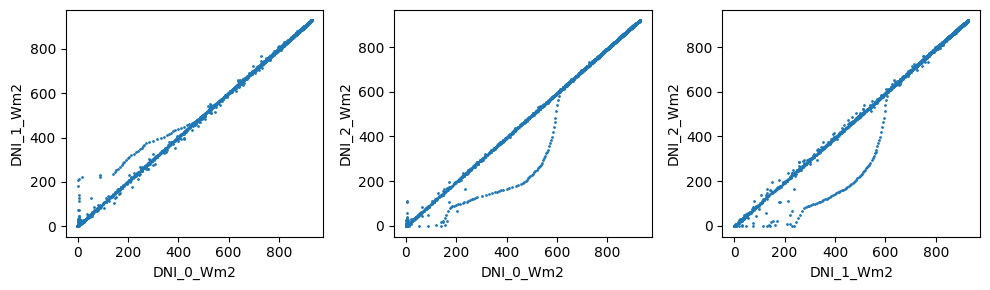

In [16]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 3))
data.plot.scatter(ax=axes[0], x='DNI_0_Wm2', y='DNI_1_Wm2', s=1)
data.plot.scatter(ax=axes[1], x='DNI_0_Wm2', y='DNI_2_Wm2', s=1)
data.plot.scatter(ax=axes[2], x='DNI_1_Wm2', y='DNI_2_Wm2', s=1)
plt.tight_layout()

Once you have taken an initial look at the data, you should compare the sensors among themselves to see how they deviate.

Is there a type of day where you would expect dew formation to be more likely?

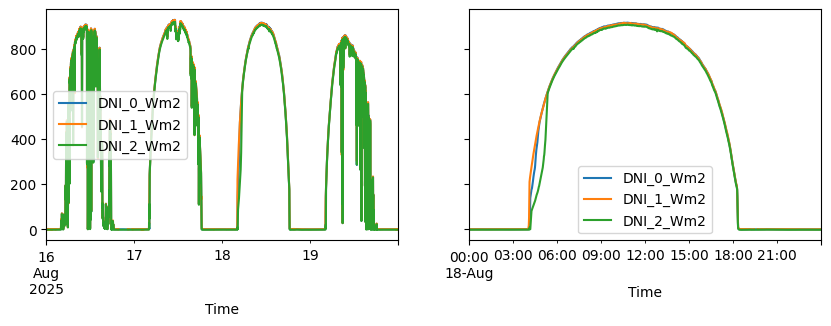

In [39]:
# Write your code here to inspect the data


### SOLUTION ####
dni_columns = [c for c in data.columns if c.startswith('DNI')]

# A simple time-series line plot
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 3))

data[dni_columns].plot(ax=axes[0])  # plot all data

data.loc['2025-08-18 00': '2025-08-18 23', dni_columns].plot(ax=axes[1])  # plot clear-sky day
plt.show()

### Solution 

The pyrheliometers DNI_0 and DNI_2 deviate from the perfect clear-sky profile measured by DNI_1. The dew effect is much stronger for DNI_2.

Knowing that DNI_1 is measured with a Hukseflux DR30 pyrheliometer, which has a heated window, it makes sense that this instrument is the least affected by dew. DNI_0 is a CHP1 and DNI_2 is a SHPI1 pyrheliometer which do not have heating.

## Step 3: Investigate the GHI sensors

Following the same approach as above, determine which GHI sensors you think that are affected by dew.

<Axes: xlabel='Time'>

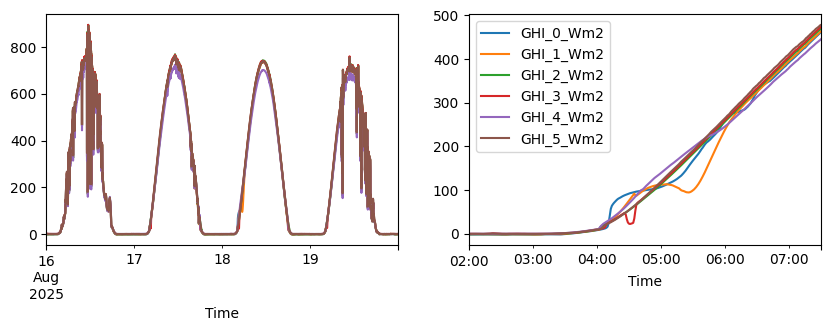

In [35]:
# Write your code here to inspect the data

### SOLUTION ####
ghi_columns = [c for c in data.columns if c.startswith('GHI')]

# A simple time-series line plot
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

data[ghi_columns].plot(ax=axes[0], legend=False)  # plot all data

data.loc['2025-08-18 02:00': '2025-08-18 07:30', ghi_columns].plot(ax=axes[1])  # plot clear-sky day

### Solution

Sensors GHI_0 and GHI_1 have the signature of a pyranometer with dew on it. The dip in the measurement of GHI_3 is consistent for all days in the dataset and is caused by an object shading it.